## CSE 422 Introduction to Data Preprocessing
---







### What are the advantages of preprocessing the data before applying on machine learning algorithm?

"The biggest advantage of pre-processing in ML is to improve **generalizablity** of your model. Data for any ML application is collected through some ‘sensors’. These sensors can be physical devices, instruments, software programs such as web crawlers, manual surveys, etc. Due to hardware malfunctions, software glitches, instrument failures, amd human errors, noise and erroneous information may creep in that can severely affect the performance of your model. Apart from **noise**, there are several **redundant information** that needs to be removed. For e.g. while predicting whether it rains tomorrow or not, age of the person is irrelevant. In terms of text processing, there are several stop words that may be redundant for the analysis. Lastly, there may be several **outliers** present in your data, due to the way data is collected that may need to be removed to improve the performance of the classifiers." 
                                    
                                            -Shehroz Khan, ML Researcher, Postdoc @U of Toronto


Some Data Preprocessing Techniques:

* Deleting duplicate and null values
* Imputation for missing values
* Handling Categorical Features
* Feature Normalization/Scaling
* Feature Engineering
* Feature Selection

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np


#Removing Null values / Handling Missing data




In [ ]:
leaf = pd.read_csv('/content/leaf_dataset.csv')
leaf.head(341)

,Class(species),specimen number,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.835920,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.798670,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.808120,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.816970,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.754930,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,36,6,0.37522,1.1417,0.81725,0.68511,0.58772,0.125230,0.091860,1.535800,0.114880,0.208610,0.041703,0.013344,0.000820,2.02810
336,36,7,0.28064,1.0849,0.75319,0.72152,0.71404,0.136860,0.078996,1.135800,0.141220,0.218300,0.045488,0.012002,0.001515,2.40590
337,36,8,0.35344,1.0329,0.78147,0.70737,0.61579,0.135030,0.089763,1.466400,0.097663,0.207030,0.041101,0.016123,0.000453,1.69350
338,36,9,0.59988,1.1427,0.71532,0.66101,0.47544,0.157470,0.113370,2.339400,0.050389,0.135850,0.018121,0.006190,0.000265,1.15260


In [ ]:
leaf.shape

(340, 16)

In [ ]:
leaf.isnull().sum()

Class(species)               0
specimen number              0
Eccentricity                 0
Aspect Ratio                 0
Elongation                   2
Solidity                     0
Stochastic Convexity         0
Isoperimetric Factor         0
Maximal Indentation Depth    1
Lobedness                    1
Average Intensity            0
Average Contrast             2
Smoothness                   0
Third moment                 0
Uniformity                   0
Entropy                      0
dtype: int64

### Imputing missing Values

In [ ]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(leaf[['Elongation']])
leaf['Elongation'] = impute.transform(leaf[['Elongation']])

impute.fit(leaf[['Maximal Indentation Depth']])
leaf['Maximal Indentation Depth'] = impute.transform(leaf[['Maximal Indentation Depth']])

impute.fit(leaf[['Lobedness']])
leaf['Lobedness'] = impute.transform(leaf[['Lobedness']])

impute.fit(leaf[['Average Contrast']])
leaf['Average Contrast'] = impute.transform(leaf[['Average Contrast']])



In [ ]:
leaf.isnull().sum()

Class(species)               0
specimen number              0
Eccentricity                 0
Aspect Ratio                 0
Elongation                   0
Solidity                     0
Stochastic Convexity         0
Isoperimetric Factor         0
Maximal Indentation Depth    0
Lobedness                    0
Average Intensity            0
Average Contrast             0
Smoothness                   0
Third moment                 0
Uniformity                   0
Entropy                      0
dtype: int64

## Standardizing Data

## Feature Scaling

## Why do we need to scale our data?
* If a feature’s variance is orders of magnitude more than the variance of other features, that particular feature might dominate other features in the dataset and make the estimator unable to learn from other features correctly, i.e. our learner might give more importance to features with high variance, which is not something we want happening in our model.

The following are a few different types of Scalers:


**MinMax Scaler:** 

Scales values to a range between 0 and 1 if no negative values, and -1 to 1 if there are negative values present.

$$\frac{X - X_{min}}{X_{max} - X_{min}}$$

where, 

 $$X\space is\space a\space feature\space value.$$ 
 $$X_{min} \space and \space X_{max} \space are \space corresponding \space feature's \space min \space and \space max \space values. $$


**Standard Scaler:**

$$\frac{X - mean}{\sigma}$$
where,
$$\sigma = standard \space deviation $$ 

**Robust Scaler:**

Uses statistics that are robust to outliers

$$\frac{X - median}{IQR}$$

where, 

$$ IQR = Inter\space Quartile\space Range = Q_3 - Q_1 $$


Sklearn library provides functions for different scalers by which we can easily scale our data.

In [ ]:
from sklearn.model_selection import train_test_split

data = leaf.drop('Class(species)', axis= 1)
target = leaf['Class(species)']

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state = 1)

print(X_train.shape)
print(X_test.shape)



(255, 15)
(85, 15)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
# transform data
X_train_scaled = scaler.transform(X_train)

In [ ]:
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))

per-feature minimum before scaling:
 specimen number              1.000000
Eccentricity                 0.117080
Aspect Ratio                 1.040500
Elongation                   0.136260
Solidity                     0.485490
Stochastic Convexity         0.473680
Isoperimetric Factor         0.086183
Maximal Indentation Depth    0.002967
Lobedness                    0.001602
Average Intensity            0.005022
Average Contrast             0.033415
Smoothness                   0.001115
Third moment                 0.000229
Uniformity                   0.000007
Entropy                      0.169400
dtype: float64
per-feature maximum before scaling:
 specimen number              14.000000
Eccentricity                  0.998710
Aspect Ratio                 19.038000
Elongation                    0.948340
Solidity                      0.993880
Stochastic Convexity          1.000000
Isoperimetric Factor          0.858160
Maximal Indentation Depth     0.198980
Lobedness                    

We can see that after Min-Max Scaling all the values are in the range [0,1]

In [ ]:
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# transform test data
X_test_scaled = scaler.transform(X_test)

## Effect of using MinMax Scaler:

###Accuracy without scaling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)

print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.09


### We can see that accuracy improves if we train on scaled data.

In [ ]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

#train
knn.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.40


## Feature Selection

### Checking for correlated features

We may use the following heatmap to find out the correlation between each of the features in a dataset. If a certain feature is highly correlated with more than one feature, we may choose to drop that feature (in this case it is *flavanoids*) because it will affect our model in a similar way as the other two features (and thus will prove to redundant). Correlation between two features may be found using the color gradient shown on the right.

In [ ]:
leaf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Class(species)             340 non-null    int64  
 1   specimen number            340 non-null    int64  
 2   Eccentricity               340 non-null    float64
 3   Aspect Ratio               340 non-null    float64
 4   Elongation                 340 non-null    float64
 5   Solidity                   340 non-null    float64
 6   Stochastic Convexity       340 non-null    float64
 7   Isoperimetric Factor       340 non-null    float64
 8   Maximal Indentation Depth  340 non-null    float64
 9   Lobedness                  340 non-null    float64
 10  Average Intensity          340 non-null    float64
 11  Average Contrast           340 non-null    float64
 12  Smoothness                 340 non-null    float64
 13  Third moment               340 non-null    float64

In [ ]:
leaf.head(341)

,Class(species),specimen number,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
0,1,1,0.72694,1.4742,0.32396,0.98535,1.00000,0.835920,0.004657,0.003947,0.047790,0.127950,0.016108,0.005232,0.000275,1.17560
1,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.798670,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
2,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.808120,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
3,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.816970,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
4,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.754930,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000023,0.34214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,36,6,0.37522,1.1417,0.81725,0.68511,0.58772,0.125230,0.091860,1.535800,0.114880,0.208610,0.041703,0.013344,0.000820,2.02810
336,36,7,0.28064,1.0849,0.75319,0.72152,0.71404,0.136860,0.078996,1.135800,0.141220,0.218300,0.045488,0.012002,0.001515,2.40590
337,36,8,0.35344,1.0329,0.78147,0.70737,0.61579,0.135030,0.089763,1.466400,0.097663,0.207030,0.041101,0.016123,0.000453,1.69350
338,36,9,0.59988,1.1427,0.71532,0.66101,0.47544,0.157470,0.113370,2.339400,0.050389,0.135850,0.018121,0.006190,0.000265,1.15260


In [ ]:
leaf_corr=leaf.corr()

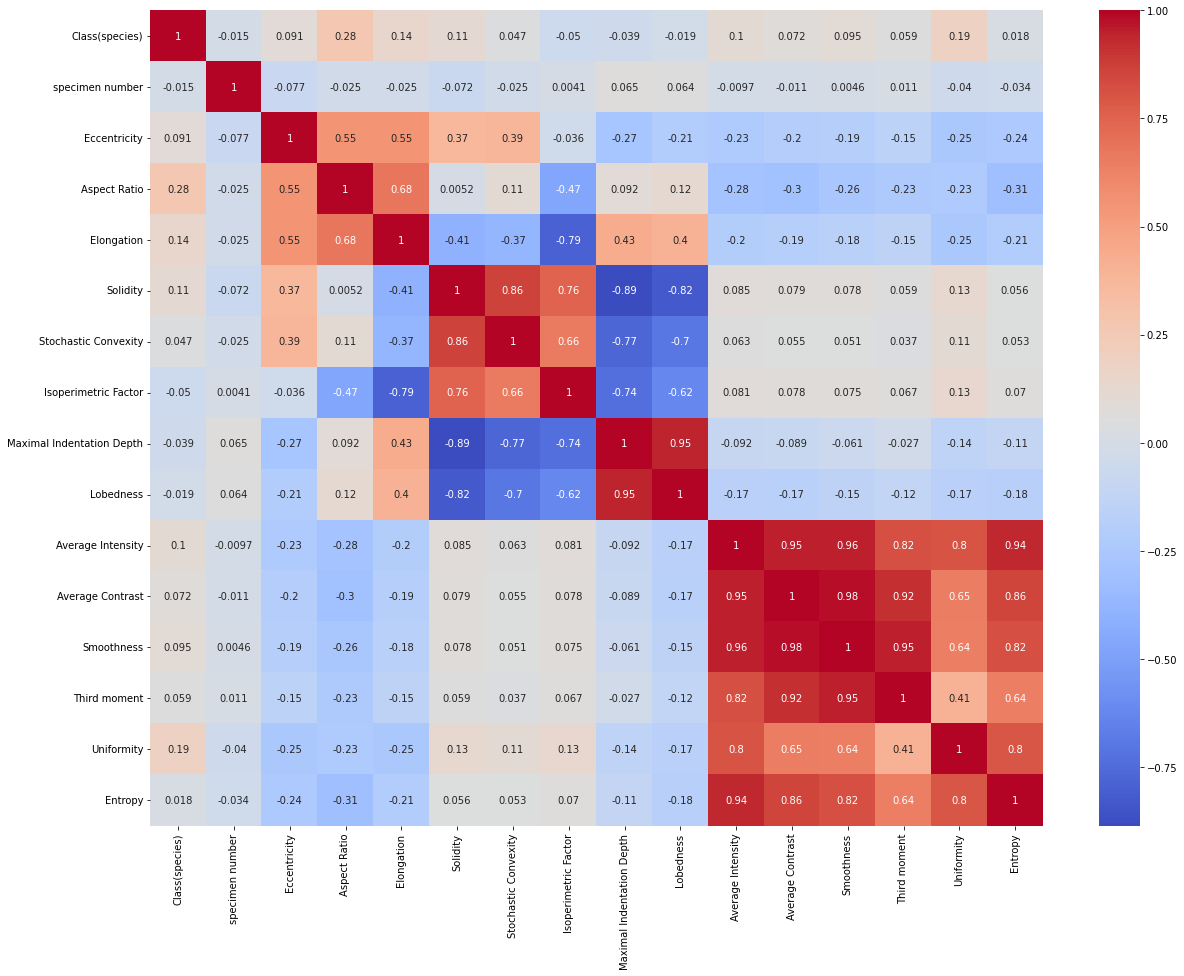

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
sns.heatmap(leaf_corr, cmap = 'coolwarm', annot=True)

plt.show()

In [ ]:
leaf.corr()

,Class(species),specimen number,Eccentricity,Aspect Ratio,Elongation,Solidity,Stochastic Convexity,Isoperimetric Factor,Maximal Indentation Depth,Lobedness,Average Intensity,Average Contrast,Smoothness,Third moment,Uniformity,Entropy
Class(species),1.000000,-0.015142,0.091415,0.275210,0.143867,0.111843,0.046678,-0.049767,-0.039323,-0.019250,0.102453,0.072118,0.094885,0.058520,0.187718,0.017690
specimen number,-0.015142,1.000000,-0.076772,-0.025490,-0.024615,-0.071623,-0.025219,0.004129,0.064834,0.063936,-0.009725,-0.010901,0.004628,0.010632,-0.040405,-0.033548
Eccentricity,0.091415,-0.076772,1.000000,0.551069,0.554869,0.373536,0.386332,-0.036086,-0.273430,-0.212853,-0.226307,-0.196781,-0.191061,-0.149555,-0.250343,-0.239689
Aspect Ratio,0.275210,-0.025490,0.551069,1.000000,0.679819,0.005173,0.107148,-0.471024,0.092287,0.122162,-0.282176,-0.299291,-0.263273,-0.233767,-0.229362,-0.312881
Elongation,0.143867,-0.024615,0.554869,0.679819,1.000000,-0.406688,-0.373786,-0.790880,0.434547,0.403601,-0.202570,-0.186769,-0.176535,-0.149193,-0.249129,-0.209207
Solidity,0.111843,-0.071623,0.373536,0.005173,-0.406688,1.000000,0.862526,0.755480,-0.886177,-0.822948,0.084869,0.078990,0.077565,0.058905,0.126265,0.055589
Stochastic Convexity,0.046678,-0.025219,0.386332,0.107148,-0.373786,0.862526,1.000000,0.655910,-0.769532,-0.699166,0.063159,0.055383,0.050713,0.036619,0.106689,0.052572
Isoperimetric Factor,-0.049767,0.004129,-0.036086,-0.471024,-0.790880,0.755480,0.655910,1.000000,-0.736491,-0.622837,0.080628,0.078290,0.074597,0.066503,0.133145,0.069783
Maximal Indentation Depth,-0.039323,0.064834,-0.273430,0.092287,0.434547,-0.886177,-0.769532,-0.736491,1.000000,0.945760,-0.091664,-0.088545,-0.061178,-0.026639,-0.137528,-0.112214
Lobedness,-0.019250,0.063936,-0.212853,0.122162,0.403601,-0.822948,-0.699166,-0.622837,0.945760,1.000000,-0.168663,-0.174945,-0.149115,-0.119706,-0.168390,-0.179890


In [ ]:
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])> threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [ ]:
# Take a minute to find the columns where the correlation value is greater than 0.75 at least twice
corr_features=correlation(leaf,0.75)
len(set(corr_features))
print('Number of correlated features: ', len(set(corr_features)))

Number of correlated features:  9


In [ ]:
print('correlated features are:', corr_features)

correlated features are: {'Uniformity', 'Third moment', 'Stochastic Convexity', 'Maximal Indentation Depth', 'Lobedness', 'Isoperimetric Factor', 'Entropy', 'Average Contrast', 'Smoothness'}


In [ ]:
# Drop those columns from the DataFrame where the correlation value is greater than 0.75 at least twice 
to_drop = corr_features  

leaf = leaf.drop(to_drop, axis=1)


leaf.head(341)

,Class(species),specimen number,Eccentricity,Aspect Ratio,Elongation,Solidity,Average Intensity
0,1,1,0.72694,1.4742,0.32396,0.98535,0.047790
1,1,2,0.74173,1.5257,0.36116,0.98152,0.024160
2,1,3,0.76722,1.5725,0.38998,0.97755,0.011897
3,1,4,0.73797,1.4597,0.35376,0.97566,0.015950
4,1,5,0.82301,1.7707,0.44462,0.97698,0.007938
...,...,...,...,...,...,...,...
335,36,6,0.37522,1.1417,0.81725,0.68511,0.114880
336,36,7,0.28064,1.0849,0.75319,0.72152,0.141220
337,36,8,0.35344,1.0329,0.78147,0.70737,0.097663
338,36,9,0.59988,1.1427,0.71532,0.66101,0.050389


## Split the dataset into features and labels

### Use your intuition to determine which column indicates the labels.






In [ ]:
features=leaf.drop('Class(species)',axis=1)
features.shape
print(features)


label = leaf['Class(species)']
label.shape
print(label)

     specimen number  Eccentricity  Aspect Ratio  Elongation  Solidity  \
0                  1       0.72694        1.4742     0.32396   0.98535   
1                  2       0.74173        1.5257     0.36116   0.98152   
2                  3       0.76722        1.5725     0.38998   0.97755   
3                  4       0.73797        1.4597     0.35376   0.97566   
4                  5       0.82301        1.7707     0.44462   0.97698   
..               ...           ...           ...         ...       ...   
335                6       0.37522        1.1417     0.81725   0.68511   
336                7       0.28064        1.0849     0.75319   0.72152   
337                8       0.35344        1.0329     0.78147   0.70737   
338                9       0.59988        1.1427     0.71532   0.66101   
339               10       0.47195        1.0901     0.85409   0.53598   

     Average Intensity  
0             0.047790  
1             0.024160  
2             0.011897  
3          

## **Summary:**

Basic Pipeline for solving a ML project:

1. Read in Dataset

2. Get to know your dataset using data vizualisation and other techniques

3. Preprocess your dataset:

  * remove/impute null values
  * remove outliers
  * feature scaling
  * feature engineering
  * feature selection

4. train/test split
5. choose and build (number of) machine learning algorithm
5. train model on training data
6. make prediction on test data
7. evaluate performance on test data
8. visualization of your results



#**Support Vector Machine (SVM), Neural Network (Multilayer Perceptron Classifier) and Random Forest**

##3. Support Vector Machine (SVM), Neural Network (Multilayer Perceptron Classifier) and Random Forest are three very popular machine learning classifiers. Divide the dataset into 8:2 train-test split and perform Support Vector Machine, Neural Network (MLPClassifier) and Random Forest on it using sklearn library. In the previous assignment, you have already used Logistic Regression and decision tree classifiers from the sklearn library. Just change the imports and the function calls to use other classifiers. Take a look at the sklearn documentation for further information.

In [ ]:
#Prepare the training set

# X = feature values, all the columns except the first column
X = features

# y = target values, first column of the data frame
y = label

In [ ]:
#Split the data into 80% training and 20% testing or Use 8:2 train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Perform Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svc= SVC(kernel="linear")
svc.fit(x_train, y_train)


SVC(kernel='linear')

#### Evaluating the SVC model

In [ ]:
print("Training accuracy of the SVC model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the SVC model is {:.2f}".format(svc.score(x_test, y_test)))

Training accuracy of the SVC model is 0.26
Testing accuracy of the SVC model is 0.24


In [ ]:
pre_svc_train_accuracy=svc.score(x_train, y_train)
pre_svc_test_accuracy=svc.score(x_test, y_test)

###Perform Neural Network (MLPClassifier) 

In [ ]:
from sklearn.neural_network import MLPClassifier
nnc= MLPClassifier(activation="relu",hidden_layer_sizes=(7),max_iter=10000)
nnc.fit(x_train, y_train)


MLPClassifier(hidden_layer_sizes=7, max_iter=10000)

###Evaluating the NNC model

In [ ]:
print("Training accuracy of the NNC model is {:.2f}".format(nnc.score(x_train, y_train)))
print("Testing accuracy of the NNC model is {:.2f}".format(nnc.score(x_test, y_test)))

Training accuracy of the NNC model is 0.64
Testing accuracy of the NNC model is 0.47


In [ ]:
pre_nnc_train_accuracy=nnc.score(x_train, y_train)
pre_nnc_test_accuracy=nnc.score(x_test, y_test)

##Perform Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)


RandomForestClassifier(n_estimators=50)

###Evaluating the RFC model

In [ ]:
print("Training accuracy of the RFC model is {:.2f}".format(rfc.score(x_train, y_train)))
print("Testing accuracy of the RFC model is {:.2f}".format(rfc.score(x_test, y_test)))

Training accuracy of the RFC model is 1.00
Testing accuracy of the RFC model is 0.65


In [ ]:
pre_rfc_train_accuracy=rfc.score(x_train, y_train)
pre_rfc_test_accuracy=rfc.score(x_test, y_test)

##4. Perform dimensionality reduction using PCA. Reduce the number of feature vectors into half (e.g. if your dataset has 10 columns, after applying PCA it should have 5 columns)

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=3)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

##5.Apply Support Vector Machine, Neural Network (MLPClassifier) and Random Forest again on the reduced dataset.

In [ ]:
#SVC after PCA
from sklearn.svm import SVC
svc= SVC(kernel="linear")
svc.fit(x_train_pca, y_train)

#Evaluating the SVC model after performing PCA
print("Training accuracy of the SVC model after performing PCA is {:.2f}".format(svc.score(x_train_pca, y_train)))
print("Testing accuracy of the SVC model after performing PCA is {:.2f}".format(svc.score(x_test_pca, y_test)))
post_svc_train_accuracy=svc.score(x_train_pca, y_train)
post_svc_test_accuracy=svc.score(x_test_pca, y_test)


Training accuracy of the SVC model after performing PCA is 0.24
Testing accuracy of the SVC model after performing PCA is 0.22


In [ ]:
#Neural Network after PCA
from sklearn.neural_network import MLPClassifier
nnc= MLPClassifier(activation="relu",hidden_layer_sizes=(7),max_iter=10000)
nnc.fit(x_train_pca, y_train)

#Evaluating the NNC model after performing PCA
print("Training accuracy of the NNC model after performing PCAis {:.2f}".format(nnc.score(x_train_pca, y_train)))
print("Testing accuracy of the NNC model after performing PCAis {:.2f}".format(nnc.score(x_test_pca, y_test)))
post_nnc_train_accuracy=svc.score(x_train_pca, y_train)
post_nnc_test_accuracy=svc.score(x_test_pca, y_test)



Training accuracy of the NNC model after performing PCAis 0.35
Testing accuracy of the NNC model after performing PCAis 0.19


In [ ]:
#Random Forest after PCA
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=50)
rfc.fit(x_train_pca, y_train)

#Evaluating the RFC model after performing PCA
print("Training accuracy of the RFC model after performing PCA is {:.2f}".format(rfc.score(x_train_pca, y_train)))
print("Testing accuracy of the RFC model after performing PCA is {:.2f}".format(rfc.score(x_test_pca, y_test)))
post_rfc_train_accuracy=svc.score(x_train_pca, y_train)
post_rfc_test_accuracy=svc.score(x_test_pca, y_test)



Training accuracy of the RFC model after performing PCA is 1.00
Testing accuracy of the RFC model after performing PCA is 0.24


##6. Compare the accuracy of the pre-PCA and post-PCA results. Plot them against each other in a bar graph.

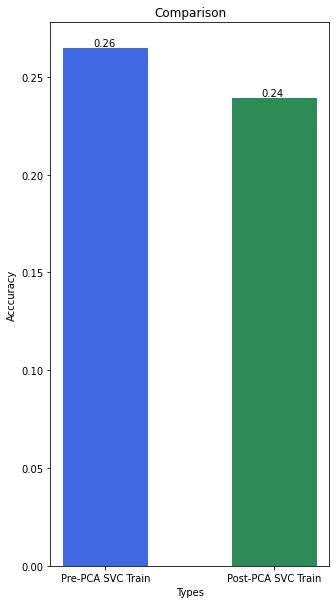

In [ ]:
# Comparing Pre-PCA SVC & Post_PCA SVC of train set
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (5, 10))
plt.bar(['Pre-PCA SVC Train', 'Post-PCA SVC Train'], [pre_svc_train_accuracy,post_svc_train_accuracy], color =['royalblue', 'seagreen'], width = 0.5)
plt.ylabel("Acccuracy")
plt.xlabel("Types")
plt.title("Comparison")
plt.text(-0.07, pre_svc_train_accuracy+0.001, round(pre_svc_train_accuracy, 2) )
plt.text(0.92, post_svc_train_accuracy+0.001, round(post_svc_train_accuracy , 2) )
plt.show()

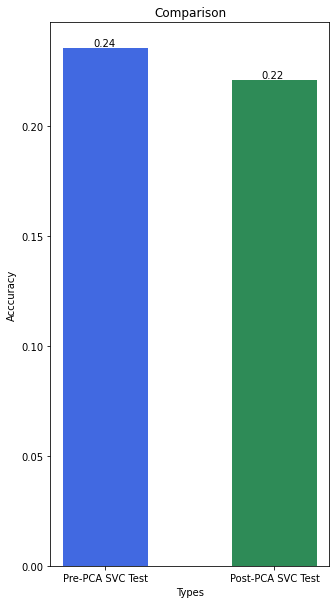

In [ ]:
# Comparing Pre-PCA SVC & Post_PCA SVC of test set
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (5, 10))
plt.bar(['Pre-PCA SVC Test', 'Post-PCA SVC Test'], [pre_svc_test_accuracy,post_svc_test_accuracy], color =['royalblue', 'seagreen'], width = 0.5)
plt.ylabel("Acccuracy")
plt.xlabel("Types")
plt.title("Comparison")
plt.text(-0.07, pre_svc_test_accuracy+0.001, round(pre_svc_test_accuracy, 2) )
plt.text(0.92, post_svc_test_accuracy+0.001, round(post_svc_test_accuracy , 2) )
plt.show()

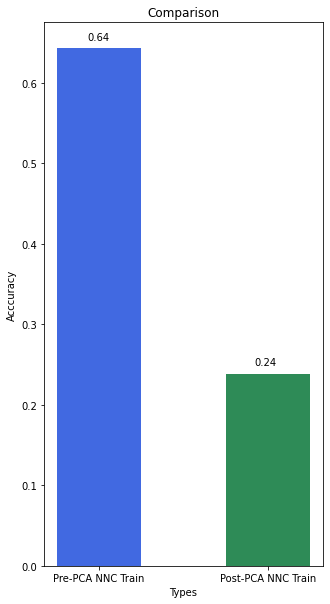

In [ ]:
# Comparing Pre-PCA Neural Network & Post_PCA Neural Network train set
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (5, 10))
plt.bar(['Pre-PCA NNC Train', 'Post-PCA NNC Train'], [pre_nnc_train_accuracy,post_svc_train_accuracy], color =['royalblue', 'seagreen'], width = 0.5)
plt.ylabel("Acccuracy")
plt.xlabel("Types")
plt.title("Comparison")
plt.text(-0.07, pre_nnc_train_accuracy+0.01, round(pre_nnc_train_accuracy, 2) )
plt.text(0.92, post_nnc_train_accuracy+0.01, round(post_nnc_train_accuracy, 2) )
plt.show()


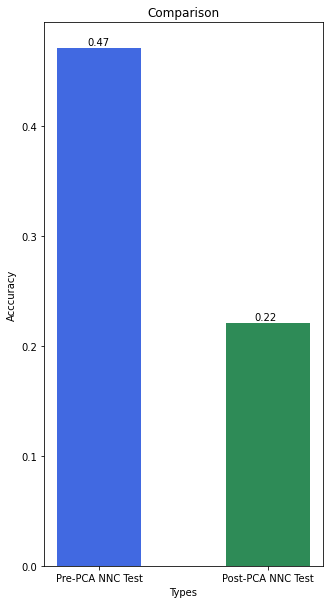

In [ ]:
# Comparing Pre-PCA Neural Network & Post_PCA Neural Network test set
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (5, 10))
plt.bar(['Pre-PCA NNC Test', 'Post-PCA NNC Test'], [pre_nnc_test_accuracy,post_svc_test_accuracy], color =['royalblue', 'seagreen'], width = 0.5)
plt.ylabel("Acccuracy")
plt.xlabel("Types")
plt.title("Comparison")
plt.text(-0.07, pre_nnc_test_accuracy+0.003, round(pre_nnc_test_accuracy, 2) )
plt.text(0.92, post_nnc_test_accuracy+0.003, round(post_nnc_test_accuracy, 2) )
plt.show()

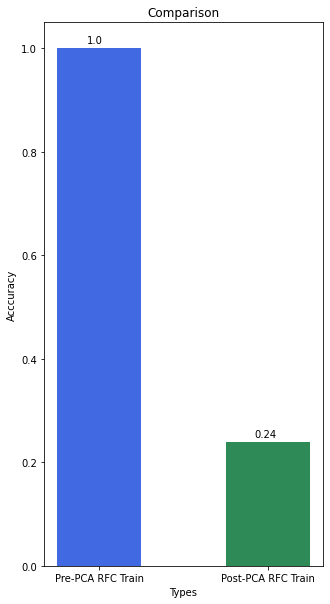

In [ ]:
# Comparing Pre-PCA Random Forest & Post_PCA Random Forest train set
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (5, 10))
plt.bar(['Pre-PCA RFC Train', 'Post-PCA RFC Train'], [pre_rfc_train_accuracy,post_rfc_train_accuracy], color =['royalblue', 'seagreen'], width = 0.5)
plt.ylabel("Acccuracy")
plt.xlabel("Types")
plt.title("Comparison")
plt.text(-0.07, pre_rfc_train_accuracy+0.01, round(pre_rfc_train_accuracy, 2) )
plt.text(0.92, post_rfc_train_accuracy+0.01, round(post_rfc_train_accuracy, 2) )
plt.show()



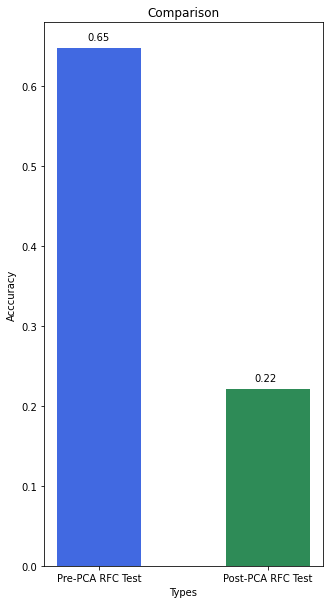

In [ ]:
# Comparing Pre-PCA Random Forest & Post_PCA Random Forest test set
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (5, 10))
plt.bar(['Pre-PCA RFC Test', 'Post-PCA RFC Test'], [pre_rfc_test_accuracy,post_rfc_test_accuracy], color =['royalblue', 'seagreen'], width = 0.5)
plt.ylabel("Acccuracy")
plt.xlabel("Types")
plt.title("Comparison")
plt.text(-0.07, pre_rfc_test_accuracy+0.01, round(pre_rfc_test_accuracy, 2) )
plt.text(0.92, post_rfc_test_accuracy+0.01, round(post_rfc_test_accuracy, 2) )
plt.show()


